Saving IInpainting.png to IInpainting (2).png


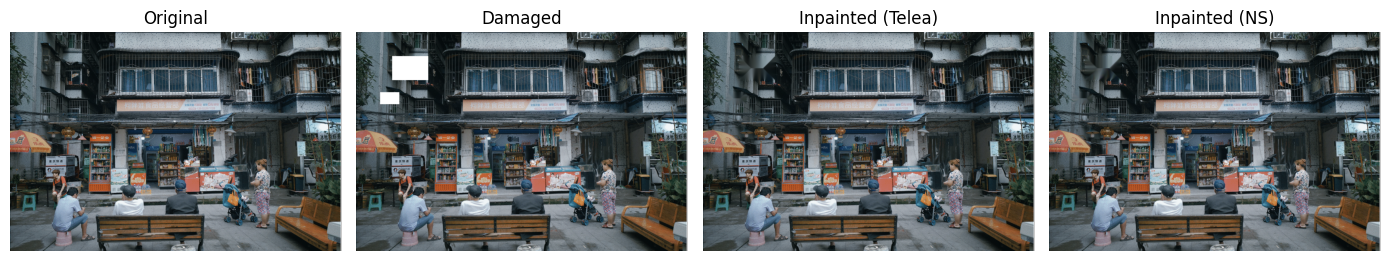

In [ ]:
#i) Image Inpainting

# Step 1: Install necessary libraries
!pip install opencv-python-headless matplotlib

# Step 2: Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 3: Upload your image
uploaded = files.upload()
img_path = next(iter(uploaded))
image = cv2.imread("/content/IInpainting.png")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 4: Simulate damage by drawing white boxes
mask = np.zeros(image.shape[:2], np.uint8)
mask[100:200, 150:300] = 255
mask[250:300, 100:180] = 255

damaged = image.copy()
damaged[mask == 255] = 255  # Draw white on mask area

# Step 5: Inpainting using OpenCV
inpainted_telea = cv2.inpaint(damaged, mask, 3, cv2.INPAINT_TELEA)
inpainted_ns = cv2.inpaint(damaged, mask, 3, cv2.INPAINT_NS)

# Step 6: Display results
plt.figure(figsize=(14, 6))
titles = ["Original", "Damaged", "Inpainted (Telea)", "Inpainted (NS)"]
images = [image, damaged, inpainted_telea, inpainted_ns]

for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


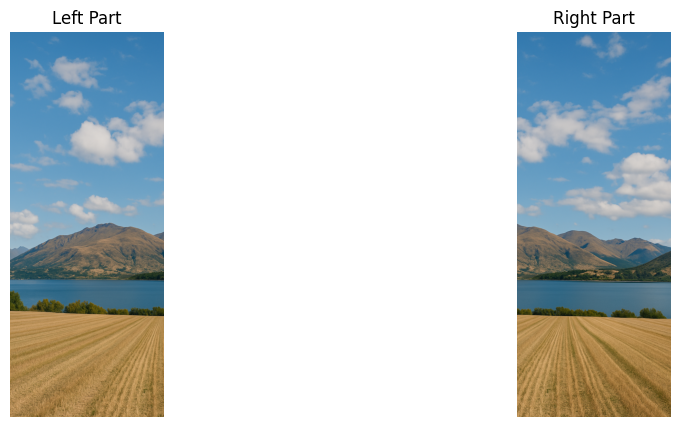

Image stitching successful!


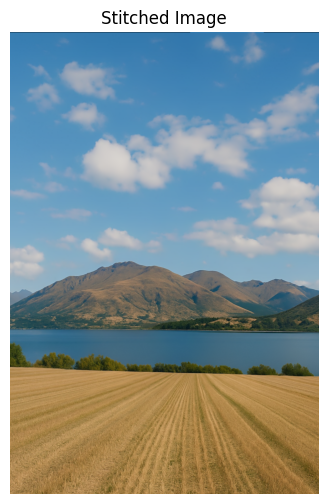

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load the full image
img = cv2.imread('/content/IS.png')  # Replace with your actual path

# Define overlap
height, width, _ = img.shape
overlap = 100  # pixels

# Create left and right images with overlap
left_img = img[:, :width//2 + overlap]
right_img = img[:, width//2 - overlap:]

# Save for stitching
cv2.imwrite("left_part.jpg", left_img)
cv2.imwrite("right_part.jpg", right_img)

# Display the two parts
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB))
plt.title("Left Part")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB))
plt.title("Right Part")
plt.axis('off')
plt.show()

# Stitch the two parts back together
# Reload to ensure clean processing
left_img = cv2.imread("left_part.jpg")
right_img = cv2.imread("right_part.jpg")

# Use OpenCV's Stitcher
stitcher = cv2.Stitcher_create()
status, stitched = stitcher.stitch([left_img, right_img])

# Show stitched result
if status == cv2.Stitcher_OK:
    print("Image stitching successful!")
    stitched_rgb = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 6))
    plt.imshow(stitched_rgb)
    plt.axis('off')
    plt.title("Stitched Image")
    plt.show()
else:
    print("Image stitching failed. Status code:", status)


Rotation Matrix (R):
 [[ 0.13373706  0.30129007  0.94410735]
 [ 0.37788168  0.86518644 -0.32963292]
 [-0.916144    0.40084501  0.00185549]]

Translation Vector (t):
 [[-3.30503896e-01]
 [-9.43804176e-01]
 [-9.23131151e-04]]


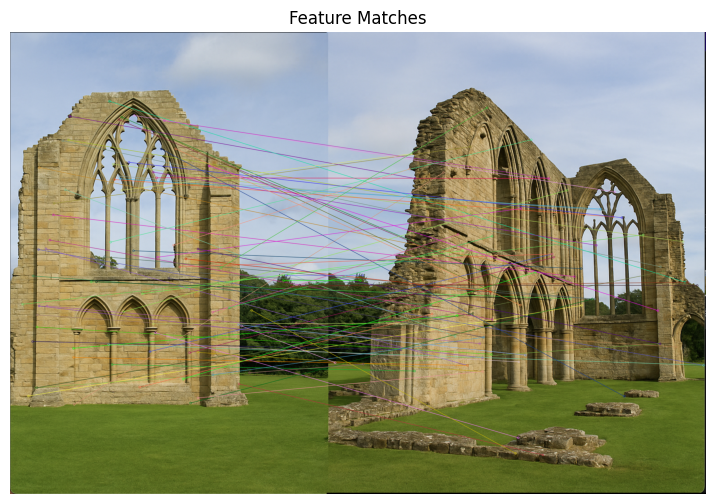

In [2]:
#iii) SFM

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load input images
img1 = cv2.imread('/content/SFM left.png')
img2 = cv2.imread('/content/SFM right.png')

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Step 1: Detect features and compute descriptors using SIFT
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Step 2: Match features using FLANN matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Lowe's ratio test
good_matches = []
pts1 = []
pts2 = []

for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# Step 3: Find Fundamental Matrix
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)

# Step 4: Assume identity camera intrinsics (replace with real K if available)
K = np.eye(3)

# Step 5: Compute Essential Matrix
E = K.T @ F @ K

# Step 6: Recover Pose (Rotation and Translation)
_, R, t, mask_pose = cv2.recoverPose(E, pts1, pts2, K)

# Print R and t
print("Rotation Matrix (R):\n", R)
print("\nTranslation Vector (t):\n", t)

# Step 7: Draw good matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                               flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Convert to RGB for matplotlib
matched_img = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

# Show result
plt.figure(figsize=(15, 6))
plt.imshow(matched_img)
plt.title("Feature Matches")
plt.axis('off')
plt.show()


ERROR: Could not find a version that satisfies the requirement tensorflow==2.11 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.11


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 2, 2, 256)      │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 4, 4, 128)      │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_7 (UpSampling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 8, 8, 64)       │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_8 (UpSampling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,367,425 (5.22 MB)

 Trainable params: 1,366,465 (5.21 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - loss: 0.0255 - val_loss: 0.0467
Epoch 2/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0149 - val_loss: 0.0175
Epoch 3/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0129 - val_loss: 0.0136
Epoch 4/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0119 - val_loss: 0.0136
Epoch 5/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0111 - val_loss: 0.0134
Epoch 6/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0105 - val_loss: 0.0123
Epoch 7/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0101 - val_loss: 0.0109
Epoch 8/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0099 - val_loss: 0.0114
Epoch 9/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0095 - val_loss: 0.0117
Epoch 10/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0092 - val_loss: 0.0104
Epoch 11/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0089 - val_loss: 0.0104
Epoch 12/300
391/391 ━━━━━

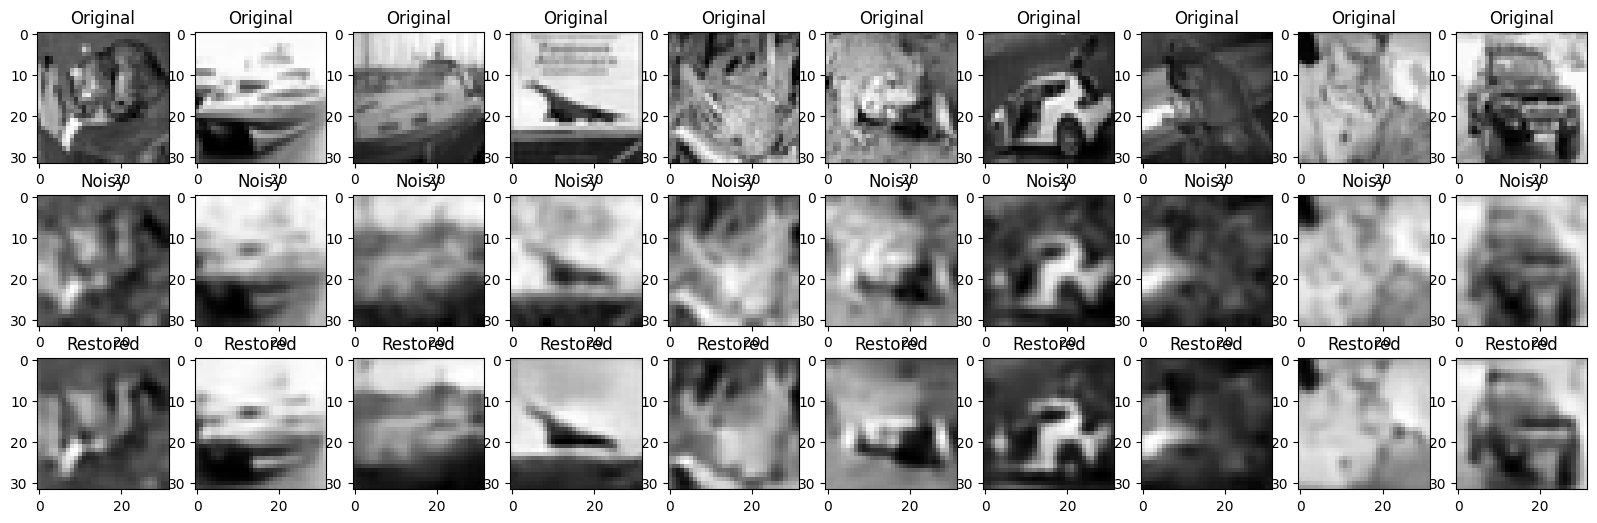

PSNR values:
22.73066
22.865623
24.198975
24.169031
22.735786
25.0603
22.645254
26.534729
24.197578
22.453796


In [12]:
# Task 2 - Image Restoration using Autoencoder Model
# Step 1: Install necessary libraries

%pip install tensorflow==2.11  # TensorFlow version 2.11 (adjust as necessary)
%pip install opencv-python-headless  # Use opencv-python-headless for compatibility in Google Colab

# Step 2: Import necessary libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Step 3: Load CIFAR-10 dataset and preprocess it

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert to grayscale
x_train_gray = np.mean(x_train, axis=-1, keepdims=True)  # Convert to grayscale
x_test_gray = np.mean(x_test, axis=-1, keepdims=True)  # Convert to grayscale

# Add noise and blur to the images
def add_noise(img):
    noise = np.random.normal(0, 0.1, img.shape)  # Gaussian noise
    return np.clip(img + noise, 0., 1.)

def add_blur(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

# Add noise and blur to the images
x_train_noisy = np.array([add_blur(add_noise(img)) for img in x_train_gray])
x_test_noisy = np.array([add_blur(add_noise(img)) for img in x_test_gray])

# Step 4: Define the enhanced Autoencoder model with deeper architecture

def build_autoencoder():
    input_img = layers.Input(shape=(32, 32, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)

    # Increase filter size and depth
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Deeper model with more features
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

    return autoencoder

# Step 5: Build and summarize the model
autoencoder = build_autoencoder()
autoencoder.summary()

# Step 6: Train the model
autoencoder.fit(x_train_noisy, x_train_gray, epochs=300, batch_size=128, validation_data=(x_test_noisy, x_test_gray))

# Step 7: Predict restored images
restored_images = autoencoder.predict(x_test_noisy)

# Step 8: Plot original, noisy, and restored images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_gray[i].reshape(32, 32), cmap='gray')
    ax.title.set_text('Original')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(32, 32), cmap='gray')
    ax.title.set_text('Noisy')

    # Restored images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(restored_images[i].reshape(32, 32), cmap='gray')
    ax.title.set_text('Restored')

plt.show()

# Step 9: Calculate PSNR values
def psnr(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

# Calculate PSNR for a few test images
psnr_values = [psnr(x_test_gray[i], restored_images[i]) for i in range(n)]

# Print PSNR values in a vertical manner
print("PSNR values:")
for value in psnr_values:
    print(value.numpy())  # Convert tensor to a NumPy array to get the value
